In [212]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot


In [213]:
hists={}
data_hists={}

for filename in os.listdir('../pods/2017'):
    if 'MET' in filename:
        
        with gzip.open('../pods/2017/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if hin[k].identifiers('region')[0] not in 'isoneM': continue
                if k in data_hists: data_hists[k]+=hin[k]
                else: data_hists[k]=hin[k]
                    
for filename in os.listdir('../pods/2017'):
    if 'MET' in filename: continue
    print(filename)
    with gzip.open('../pods/2017/'+filename) as fin:
        hin = pickle.load(fin)
        for k in hin.keys():
            if hin[k].identifiers('region')[0] not in 'isoneM': continue
            #if 'WJetsToLNu'in filename: 
            #    for h in hin.values(): h.scale(1.1)
            #if 'DYJets'in filename: 
            #    for h in hin.values(): h.scale(1.1)
            if k in hists: hists[k]+=hin[k]
            else: hists[k]=hin[k]
            
#print(data_hists['recoil'].identifiers('region')[0])
#print(data_hists)


DYJetsToLL_M-50_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8.pkl.gz
WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8.pkl.gz
DYJetsToLL_M-50_HT-1200to2500_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
ST_t-channel_top_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8.pkl.gz
DYJetsToLL_M-50_HT-100to200_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
ST_t-channel_antitop_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8.pkl.gz
ZZ_TuneCP5_13TeV-pythia8.pkl.gz
DYJetsToLL_M-50_HT-2500toInf_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
DYJetsToLL_M-50_HT-400to600_TuneCP5_13TeV-madgraphMLM-pythia8.pkl.gz
DYJetsToLL_M-50

In [214]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset",)
process_map = OrderedDict()

#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
#process_map["ZZ"] = ("ZZ*",)
process_map["Zjets"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)

#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
data_map = OrderedDict()
data_map["Data"] = ("MET*", )
for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    data_hists[key] = data_hists[key].group(process, process_cats, data_map)


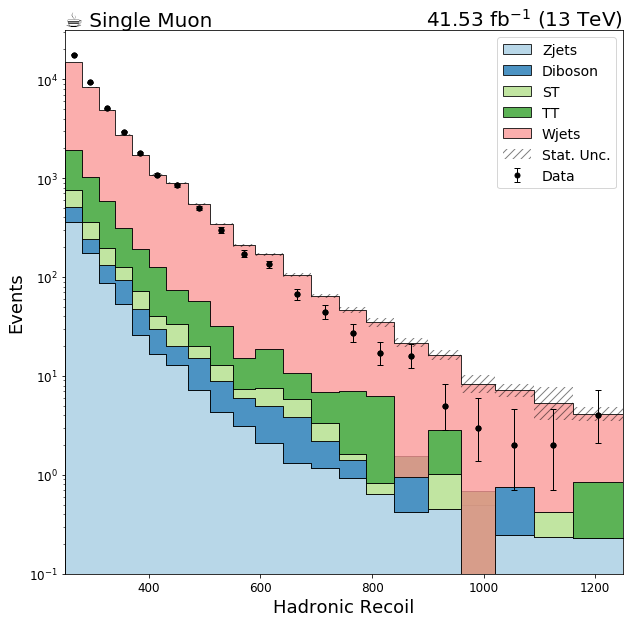

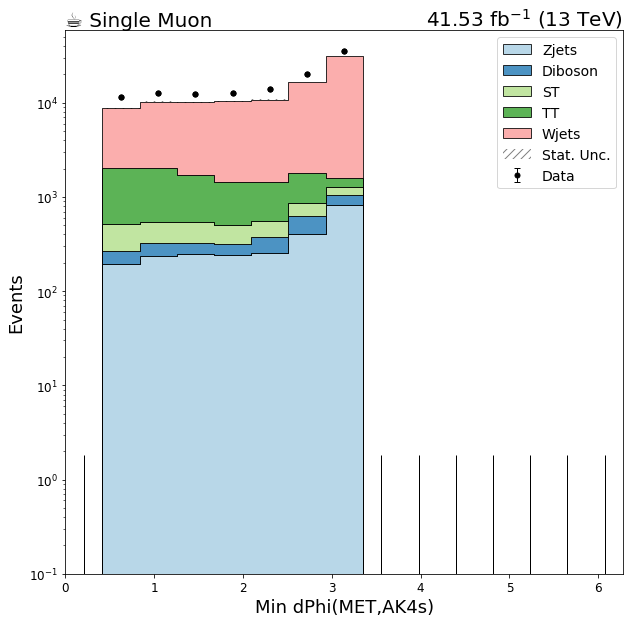

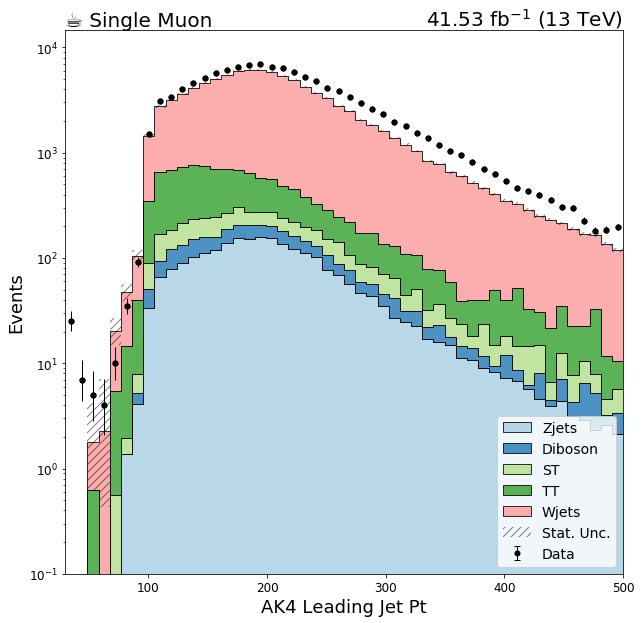

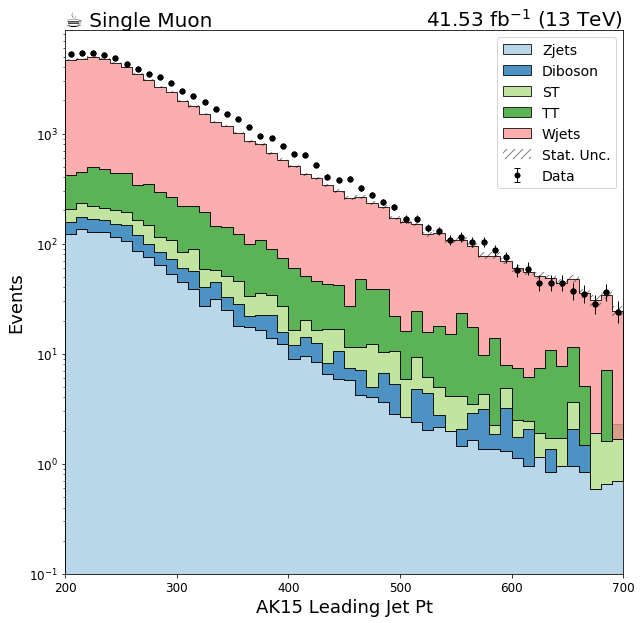

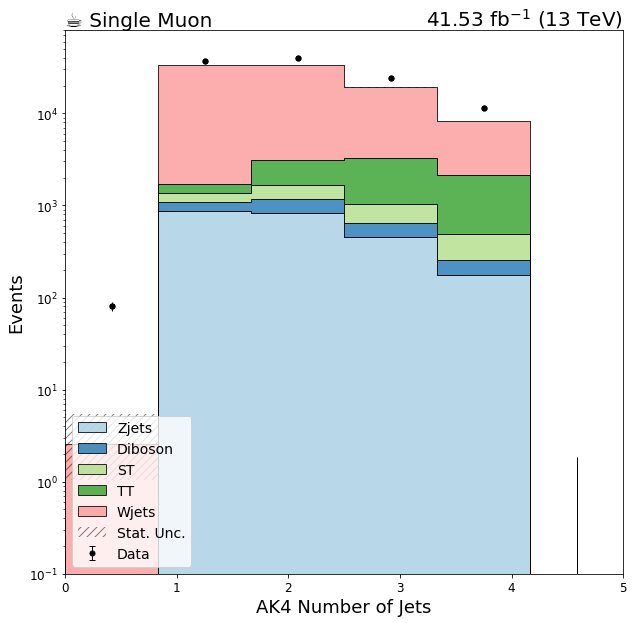

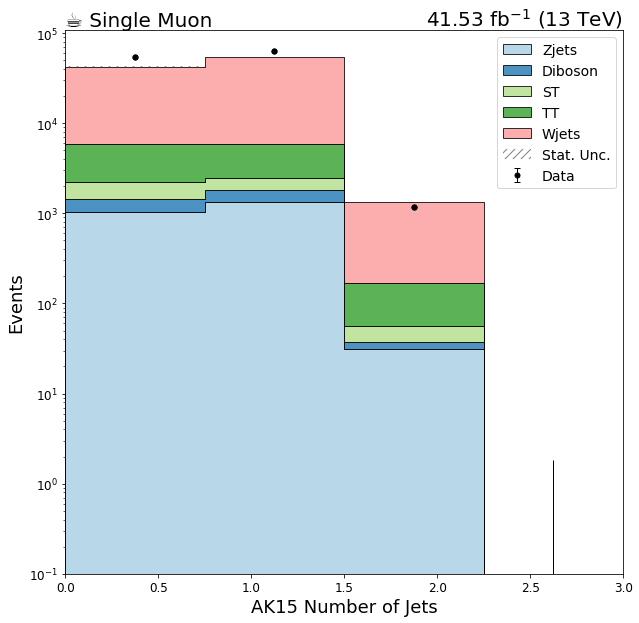

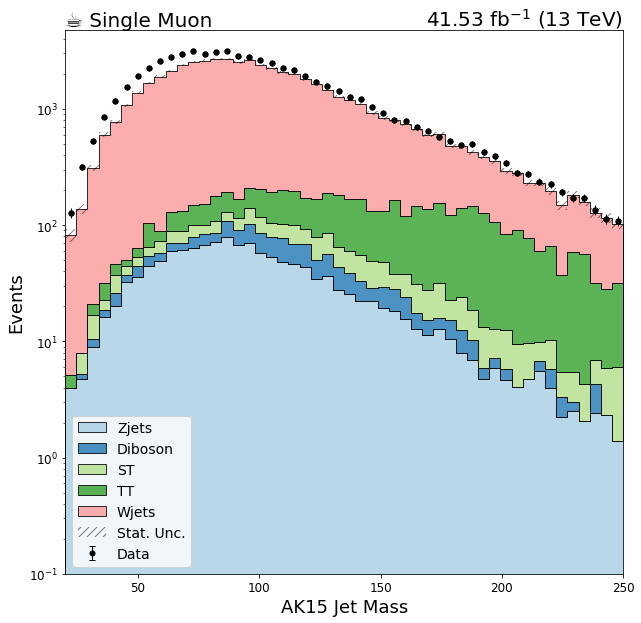

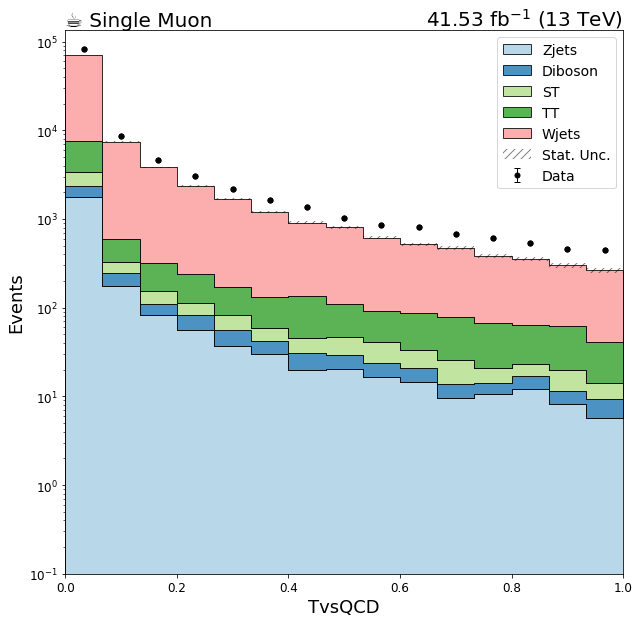

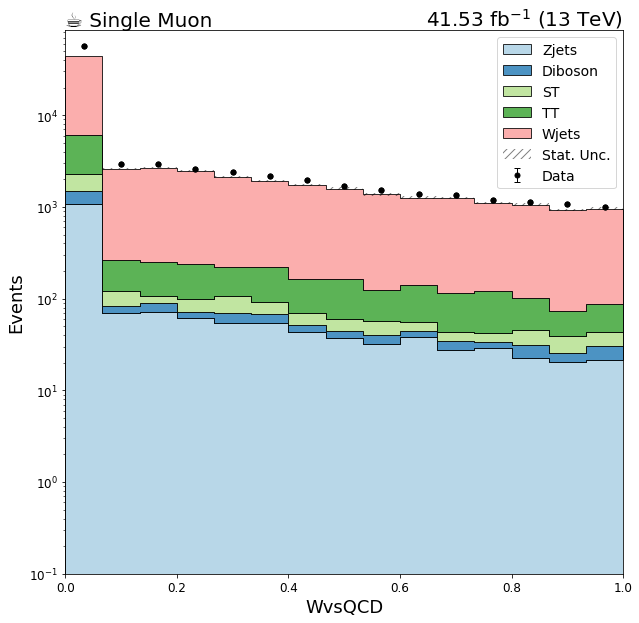

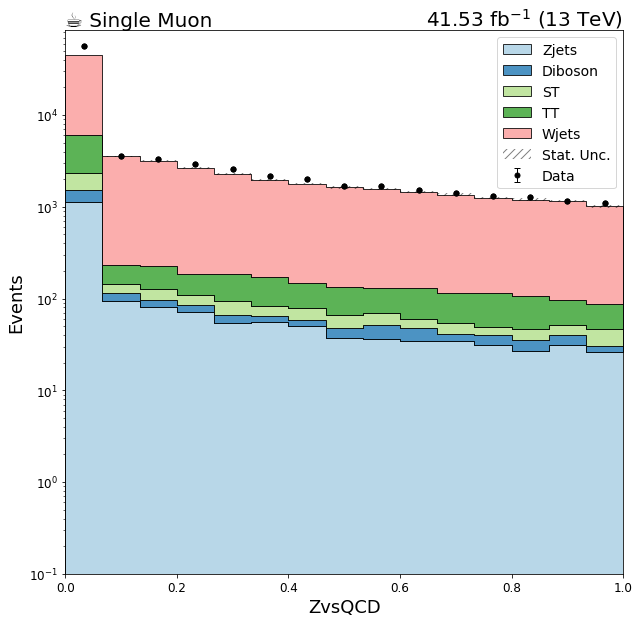

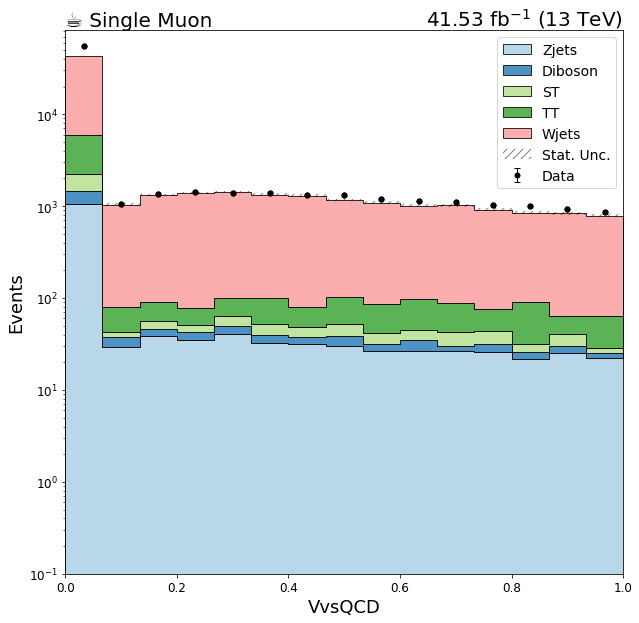

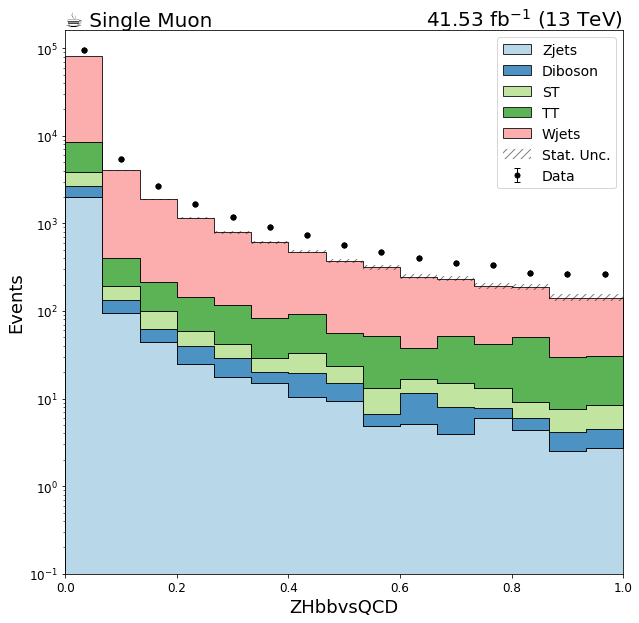

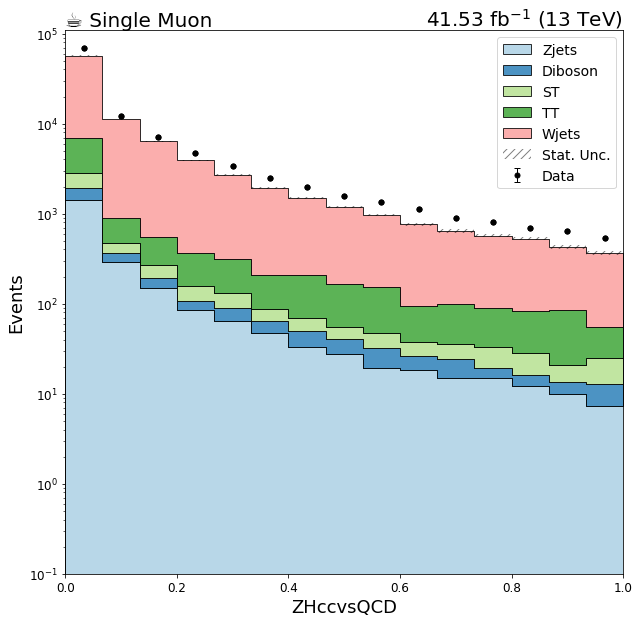

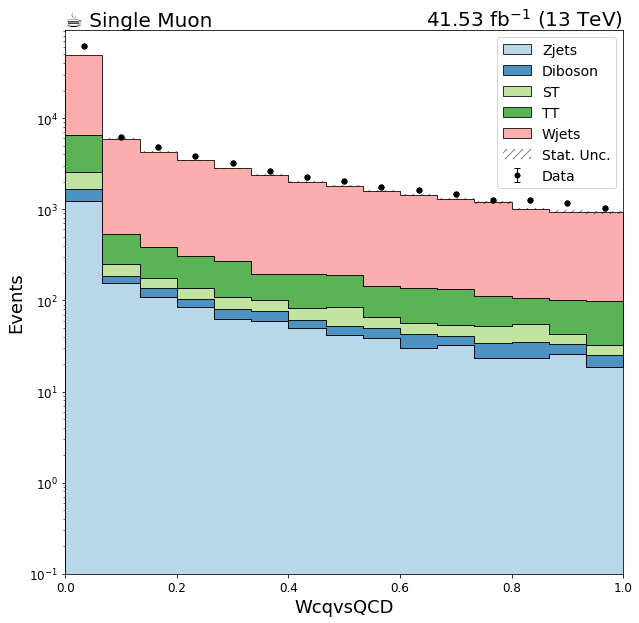

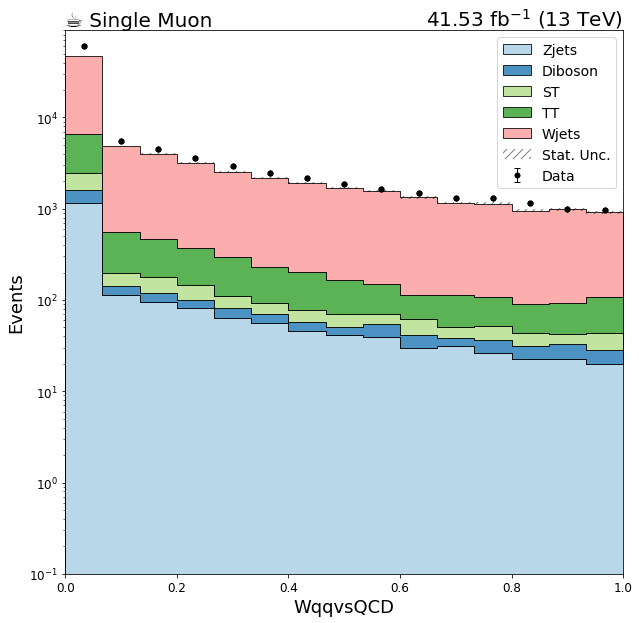

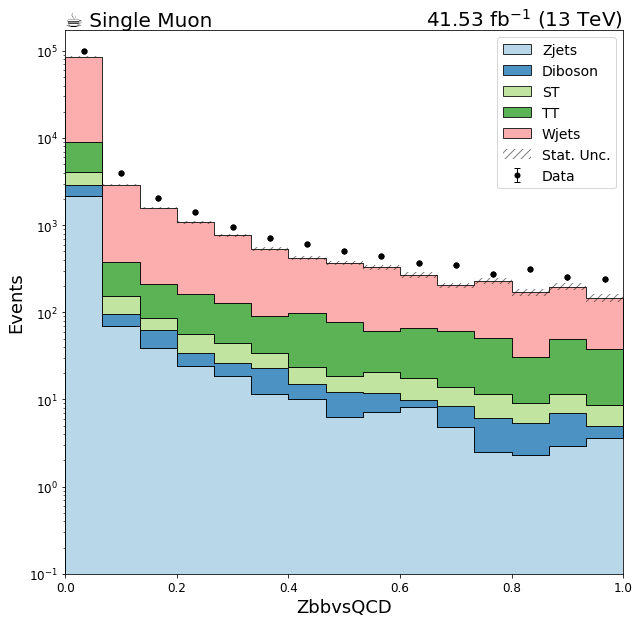

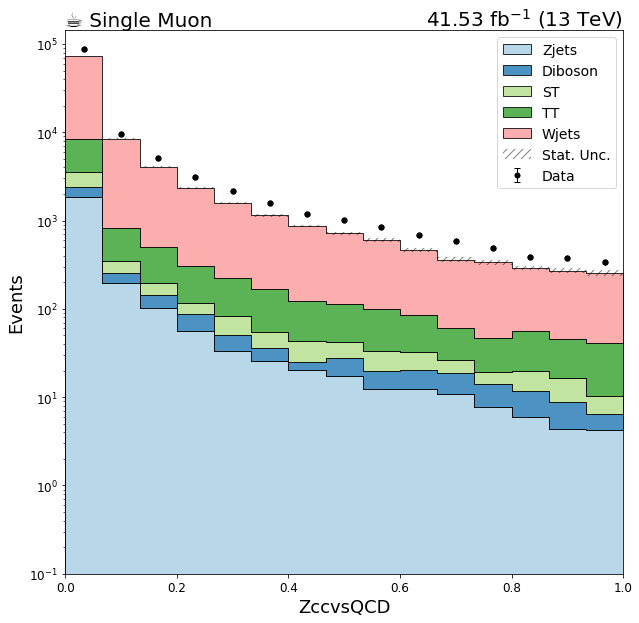

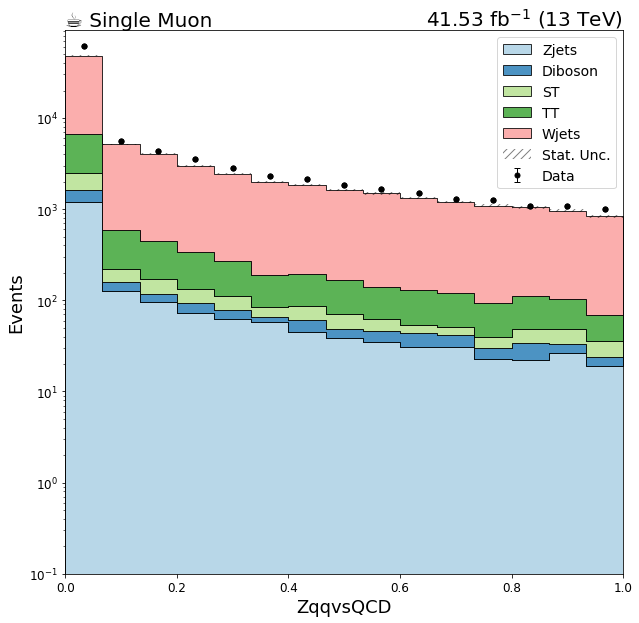

In [215]:
from cycler import cycler

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']


for key in hists.keys():
    hists[key].scale({'Wjets':1.6},axis='process')
    hists[key].scale({'Zjets':1.6},axis='process')
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    plot.plot1d(data_hists[key].project('region'),
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
           )

    plot.plot1d(hists[key].project('region'), ax=ax, overlay="process", clear=False, stack=True, line_opts=None, fill_opts=fill_opts, error_opts=error_opts)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"41.53 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

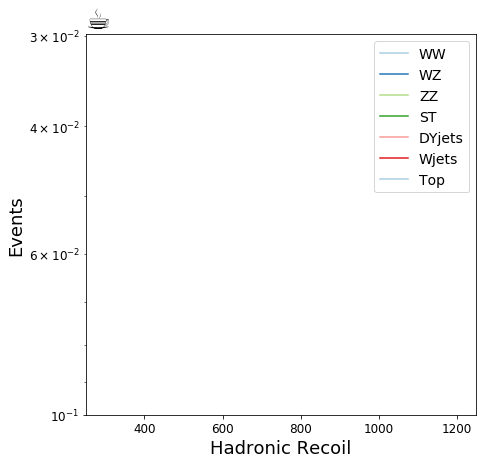

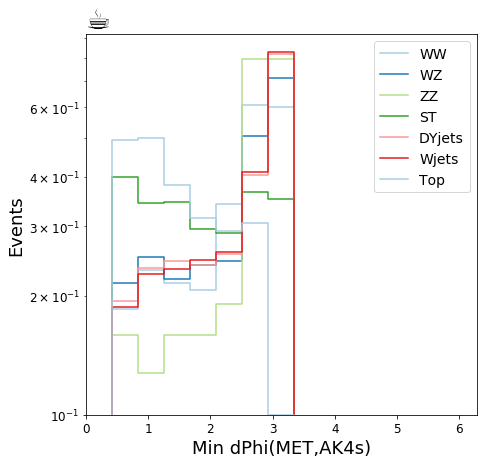

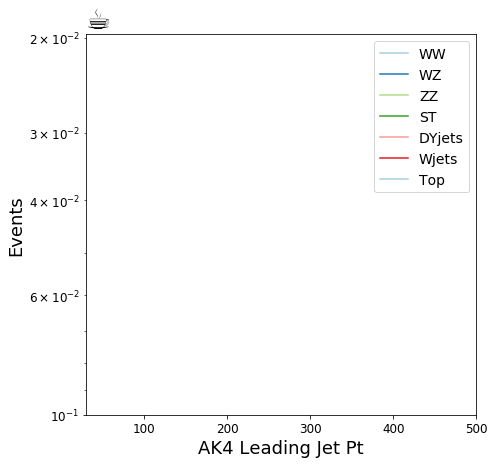

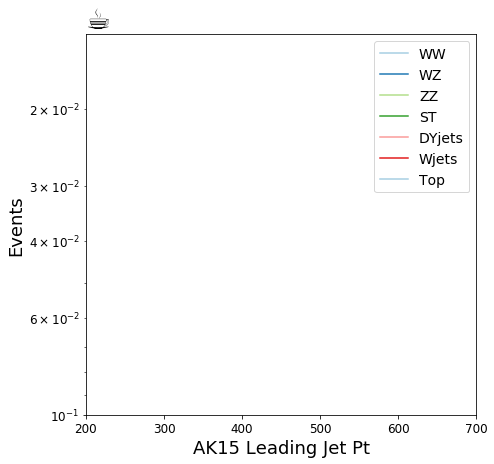

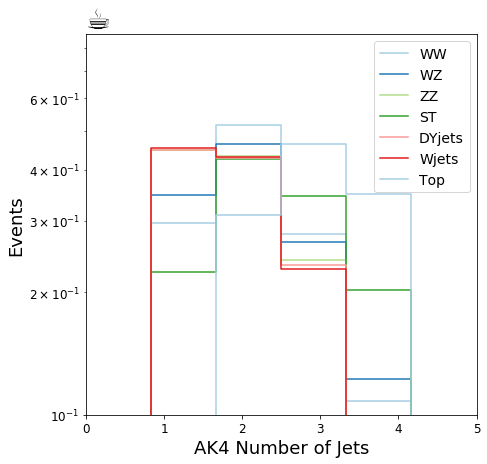

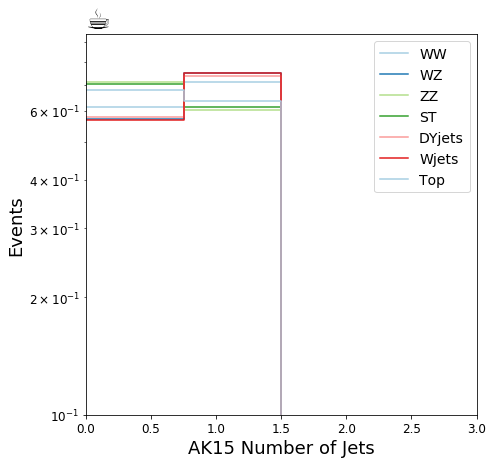

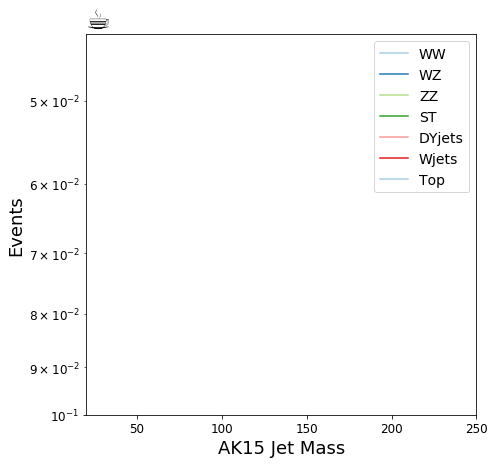

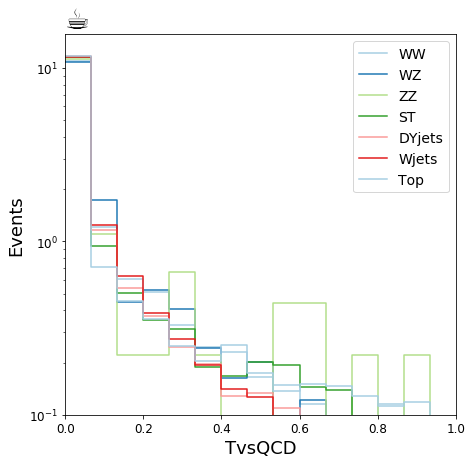

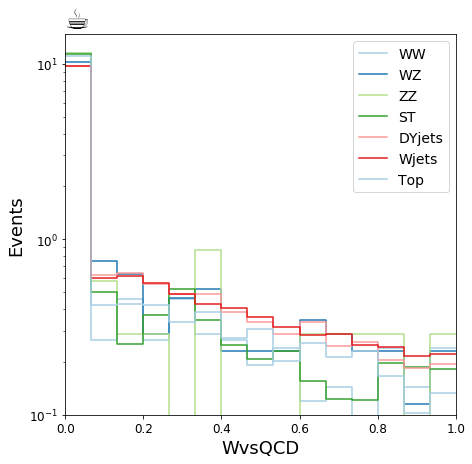

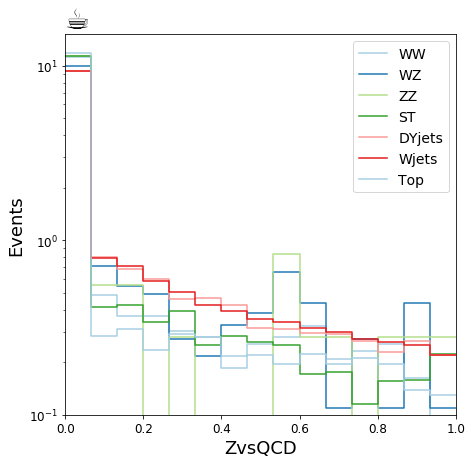

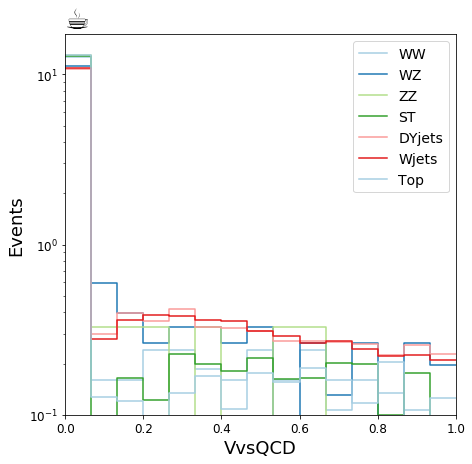

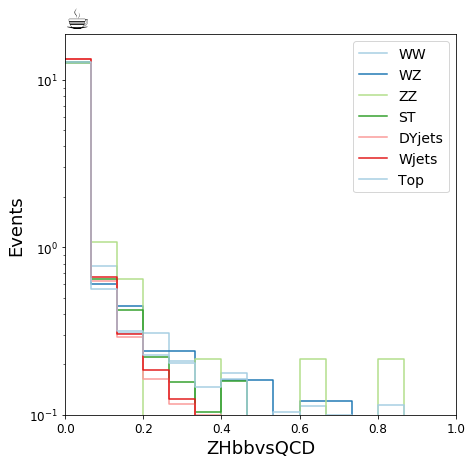

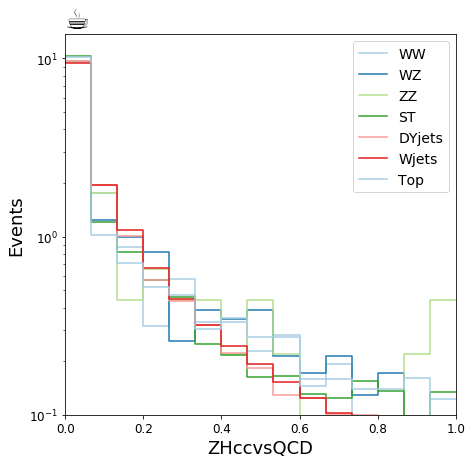

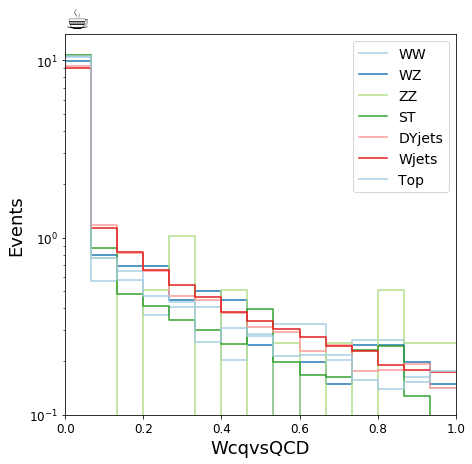

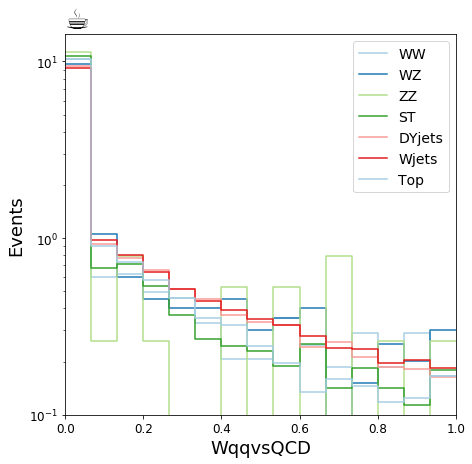

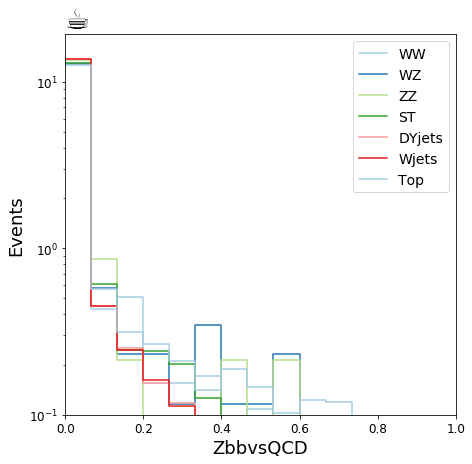

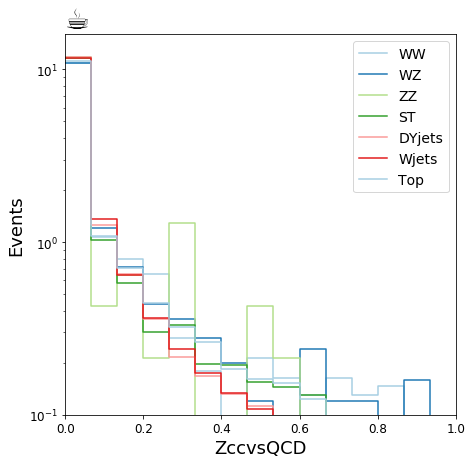

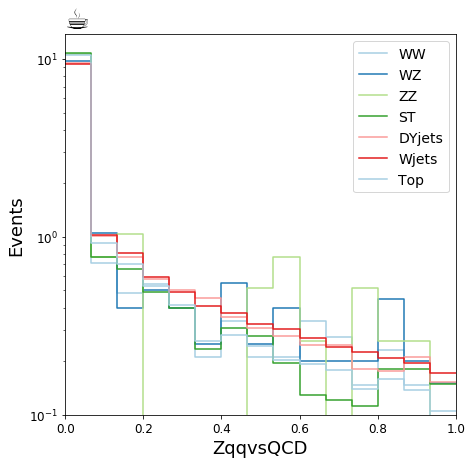

In [19]:
for key in hists.keys():
    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

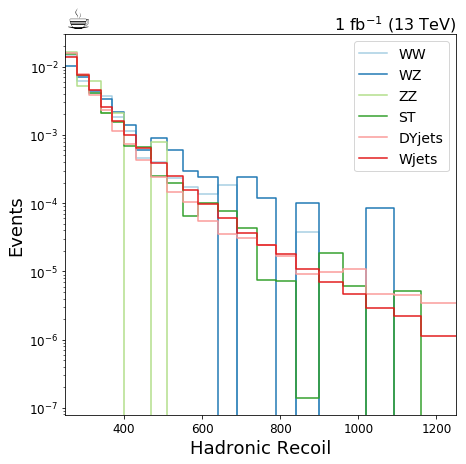

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists["recoil"].project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)